A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

*Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.*

**Libraries**

*contains all the libraries used in the project*

In [224]:
import pandas as pd
# pandas is a software library written for the Python programming language for data manipulation and analysis. 
import numpy as np
# a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
# along with a large collection of high-level mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for
# drawing attractive and informative statistical graphics.
%matplotlib inline

**Data Loading**

*data loading process which is then followed by a simple data exploration*

In [225]:
df = pd.read_csv('BankChurners.csv')
# A simple way to store big data sets is to use CSV files (comma separated files).

In [226]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
# dropping columns we dont need

In [261]:
df.head()
# used to get the first n rows. This function returns the first n rows for the object based on position

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [263]:
df.tail()
# used to get the last n rows. This function returns last n rows from the object based on position.

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [229]:
df.info()
# The info() function is used to print a concise summary of a DataFrame. This method prints information about a 
# DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [265]:
df.shape
# used to view the number of dataset's rows and columns.

(10127, 21)

In [264]:
df.describe()
# used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric 
# values.

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**Data Cleaning**

*the process of preparing data in the form of data cleaning before further data exploration is carried out. The cleaning process can be in the form of giving a new name for each column, filling in missing values, deleting unused columns, and so on.*

In [232]:
df.isnull().sum(axis=0)
# The isnull() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, 
# non-null values and memory usage, then, we Sum up those values.

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There is 0 null / Nan values in our dataset

In [233]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

**Data Exploration**

*This section contains data exploration on the dataset above by using queries, grouping, simple visualization, and so on*

**Distribution of Customer Ages**

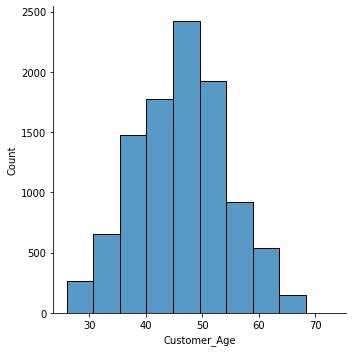

In [234]:
sns.displot(df['Customer_Age'],kde=False,bins=10)

<AxesSubplot:>

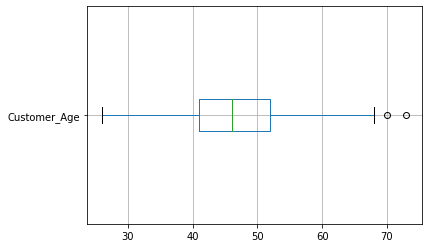

In [235]:
df.boxplot('Customer_Age',vert=False)

We can see that the distribution of customer ages in our dataset follows a fairly normal distribution; thus, further use of the age feature can be done with the normality assumption

**Distribution Of Gender And Different Card Statuses**

In [236]:
gender = df['Gender'].value_counts()
gender

F    5358
M    4769
Name: Gender, dtype: int64

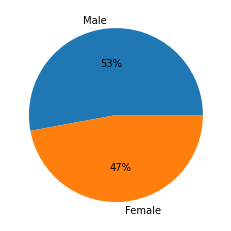

In [237]:
labels = ['Male','Female']
plt.pie(gender, labels = labels, autopct='%.0f%%')
plt.show()

In [238]:
card_statuses_by_gender = df.groupby(['Gender'])['Card_Category'].value_counts()
card_statuses_by_gender

Gender  Card_Category
F       Blue             5101
        Silver            210
        Gold               38
        Platinum            9
M       Blue             4335
        Silver            345
        Gold               78
        Platinum           11
Name: Card_Category, dtype: int64

More samples of females in our dataset are compared to males, but the percentage of difference is not that significant, so we can say that genders are uniformly distributed.

**Distribution of Dependent counts**

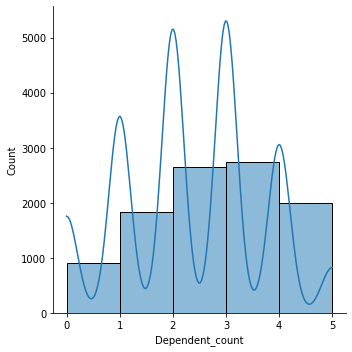

In [239]:
sns.displot(df['Dependent_count'],kde=True,bins=5)

<AxesSubplot:>

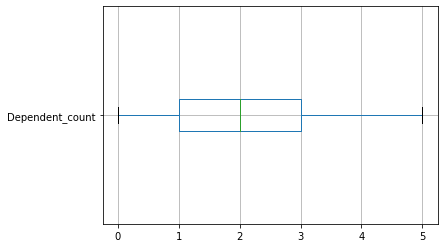

In [240]:
df.boxplot('Dependent_count',vert=False)

The distribution of Dependent counts is fairly normally distributed with a slight right skew.

**Propotion of Educational Levels**

In [241]:
propotion_of_education_levels = df['Education_Level'].value_counts()
propotion_of_education_levels

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

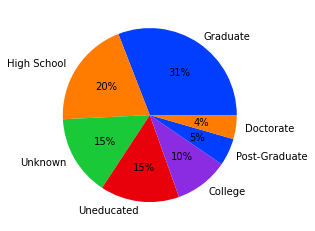

In [242]:
data = propotion_of_education_levels
labels = ['Graduate', 'High School ', 'Unknown', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']

colors = sns.color_palette('bright')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

If most of the customers with unknown education status lack any education, we can state that more than 70% of the customers have a formal education level. About 35% have a higher level of education.

**Propotion of Different Marriage Statuses**

In [243]:
propotion_of_marriage_statuses = df['Marital_Status'].value_counts()
propotion_of_marriage_statuses

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

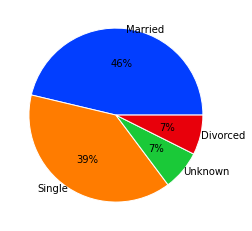

In [244]:
data = proportion_of_marriage_statuses
labels = ['Married', 'Single', 'Unknown', 'Divorced']

colors = sns.color_palette('bright')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',labeldistance=1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.show()

Almost half of the bank customers are married, and interestingly enough, almost the entire other half are single customers. only about 7% of the customers are divorced.

**Propotion of Different Income Levels**

In [245]:
propotion_of_different_income_levels = df['Income_Category'].value_counts()
propotion_of_different_income_levels

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

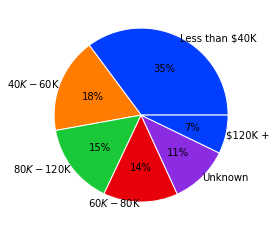

In [246]:
data = propotion_of_different_income_levels
labels = ['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K', 'Unknown', '$120K +']

colors = sns.color_palette('bright')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', labeldistance=1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.show()

**Propotion of Different Card Categories**

In [247]:
propotion_of_different_card_categories = df['Card_Category'].value_counts()
propotion_of_different_card_categories

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

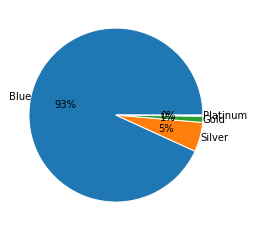

In [248]:
data = propotion_of_different_card_categories
labels = ['Blue', 'Silver', 'Gold', 'Platinum']

# colors = sns.color_palette('bright')[0:5]

plt.pie(data, labels = labels,autopct='%.0f%%', labeldistance=1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.show()

**Distribution of Months the customer is part of the bank**

<AxesSubplot:>

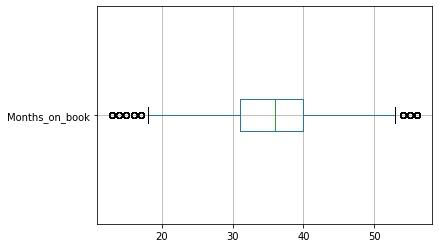

In [249]:
df.boxplot('Months_on_book',vert=False)

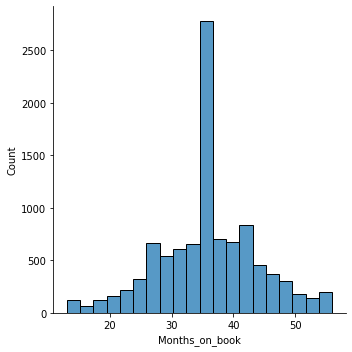

In [250]:
sns.displot(df['Months_on_book'],kde=False,bins=20)

In [251]:
print('Kurtosis of Months on book features is : {}'.format(df['Months_on_book'].kurt()))

Kurtosis of Months on book features is : 0.40010012019986707


We have a low kurtosis value pointing to a very flat shaped distribution (as shown in the plots above as well), meaning we cannot assume normality of the feature.

**Distribution of Total no. of products held by the customer**

<AxesSubplot:>

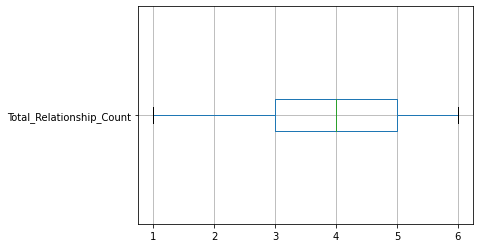

In [252]:
df.boxplot('Total_Relationship_Count',vert=False)

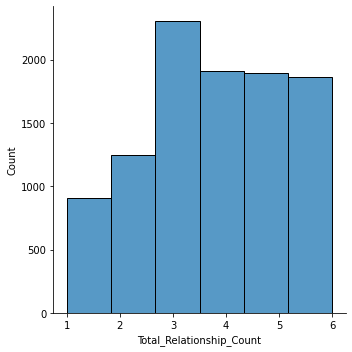

In [253]:
sns.displot(df['Total_Relationship_Count'],kde=False, bins=6)

The distribution of the total number of products held by the customer seems closer to a uniform distribution and may appear useless as a predictor for churn status.

**Distribution of the number of months inactive in the last 12 months**

<AxesSubplot:>

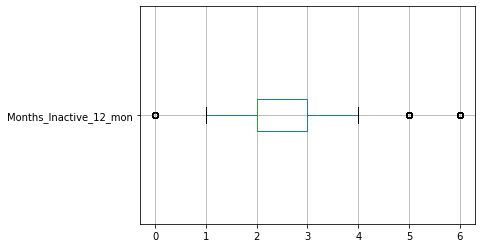

In [254]:
df.boxplot('Months_Inactive_12_mon',vert=False)

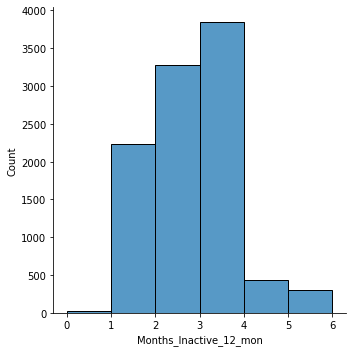

In [255]:
sns.displot(df['Months_Inactive_12_mon'],kde=False, bins=6)

**Distribution of the Credit Limit**

<AxesSubplot:>

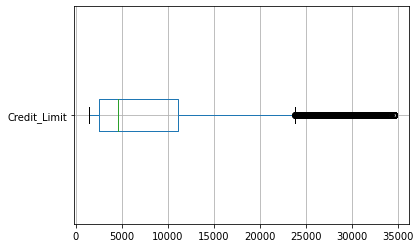

In [256]:
df.boxplot('Credit_Limit',vert=False)

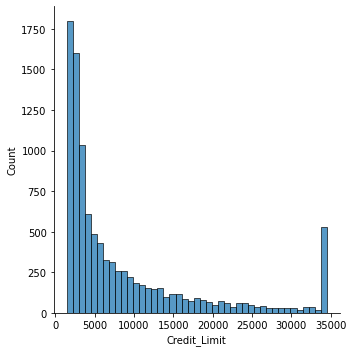

In [257]:
sns.displot(df['Credit_Limit'],kde=False)

**Distribution of the Total Transaction Amount (Last 12 months)**

<AxesSubplot:>

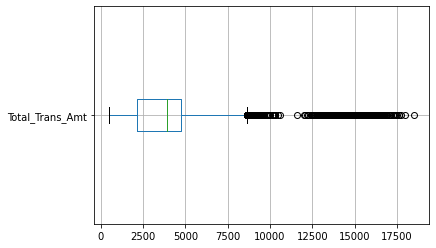

In [258]:
df.boxplot('Total_Trans_Amt',vert=False)

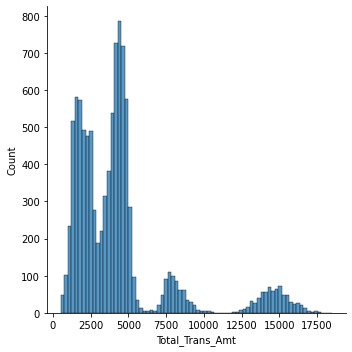

In [259]:
sns.displot(df['Total_Trans_Amt'],kde=False)

We see that the distribution of the total transactions (Last 12 months) displays a multimodal distribution, meaning we have some underlying groups in our data; it can be an interesting experiment to try and cluster the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.

**Proportion of churn vs not churn customers**

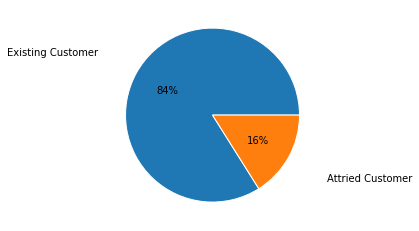

In [260]:
proportion_of_churn_vs_not_churn_customers = df['Attrition_Flag'].value_counts()

data = proportion_of_churn_vs_not_churn_customers
labels = ['Existing Customer', 'Attried Customer']

plt.pie(data, labels = labels, autopct='%.0f%%', labeldistance=1.5, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.show()

As we can see, only 16% of the data samples represent churn customers